In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
import matplotlib.pyplot as plt # import matplotlib
%matplotlib inline
import seaborn as sns # seaborn data visualizer
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [2]:
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
features_list = list(df.drop(columns='Outcome').columns)
columns = list(df.columns)
print(features_list)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [4]:
isnull = df.isnull().sum()
isnull

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
dup = df.duplicated(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
dup.value_counts()

False    768
dtype: int64

In [6]:
df.drop_duplicates(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:xlabel='Outcome', ylabel='count'>

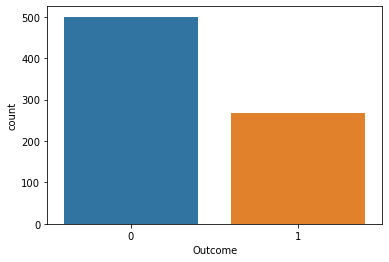

In [7]:
sns.countplot(x='Outcome', data= df )

# HEATMAP

**Visualize and confirm the correlation between features. Although seemingly trivial, statistical analysis is a very important task.**


If you have time, draw a scatter plot between features as well.

You can get something out of a visualized graph.

<AxesSubplot:title={'center':'Diabetes Correlation of Features'}>

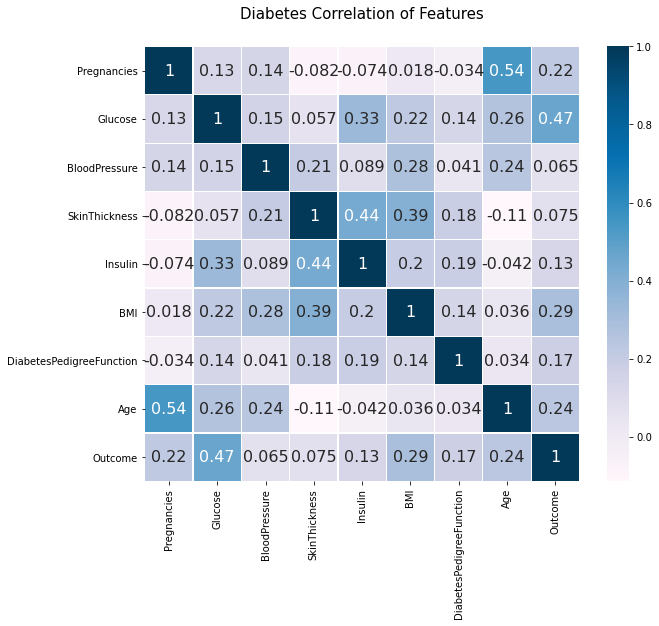

In [8]:
colormap = plt.cm.PuBu 
plt.figure(figsize=(10, 8)) 
plt.title("Diabetes Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(df.astype(float).corr(), linewidths = 0.1, vmax = 1.0, 
            square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [9]:
features = df[['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction']]
Y = df['Outcome']

In [10]:
train_features, test_features, train_labels, test_labels = train_test_split(features, Y)

In [11]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
model_params = {
    'knn':{
        'model': KNeighborsClassifier(),
        'params':{
            'n_neighbors':[1,3,5,7,9]
        }
    },
    'GB':{
        'model': GradientBoostingClassifier(),
        'params':{
            'n_estimators':[20],
            'learning_rate':[0.05,0.075,0.1,0.25]
        }
    },
    'SVM': {
        
        'model': SVC(gamma='auto'),
        'params' : {
            'kernel': ['rbf','linear']
        }  
   },
   'RF': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,15,20,25,30]
        }
     },
    'LR' : {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'C': [1,5,10,15,20,25]
        }
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy']
        }
    }
}

scores = []

X_train, X_test, y_train, y_test= train_test_split(features,Y,test_size=0.2)


In [14]:
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(train_features, train_labels)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_new=df_score.head(6)

In [15]:
df_score.head(6)

,model,best_score,best_params
0,knn,0.736087,{'n_neighbors': 9}
1,GB,0.739610,"{'learning_rate': 0.075, 'n_estimators': 20}"
2,SVM,0.760435,{'kernel': 'linear'}
3,RF,0.732609,{'n_estimators': 10}
4,LR,0.762159,{'C': 1}
5,DT,0.671934,{'criterion': 'gini'}


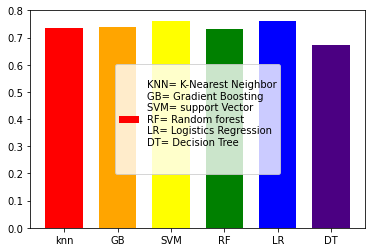

In [28]:
label='''
KNN= K-Nearest Neighbor
GB= Gradient Boosting
SVM= support Vector 
RF= Random forest
LR= Logistics Regression
DT= Decision Tree

'''
plt.bar(df_new['model'],df_new['best_score'],width=0.7,label= label,color=['red', 'orange', 'yellow', 'green', 'blue', 'indigo'] )
plt.legend(loc=10)

In [18]:
model= LogisticRegression(solver='liblinear',C=1.0).fit(X_train,y_train)
model.score(X_test,y_test)

0.7727272727272727

In [19]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[88,  2],
       [33, 31]], dtype=int64)

Text(69.0, 0.5, 'True')

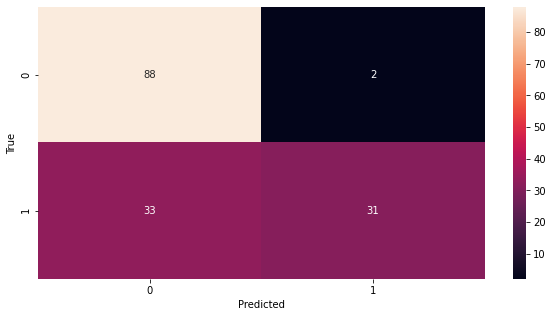

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.98      0.83        90
           1       0.94      0.48      0.64        64

    accuracy                           0.77       154
   macro avg       0.83      0.73      0.74       154
weighted avg       0.82      0.77      0.75       154

